In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import torch
from transformers import AutoTokenizer, AutoModel

In [6]:
df = pd.read_excel("../data/dataset.xlsx")
df

,news,class
0,В Башкирии маленький мальчик упал с велосипе...,-1
1,В Белорецком районе ввели режим ЧС из-за лесн...,-1
2,В Башкирии в селе Хамитово горят несколько уса...,-1
3,В Башкирии судебного пристава нашли мертвым В ...,-1
4,Пожар на нефтебазе в уфимской Нижегородке лока...,-1
...,...,...
3563,Предоставление субсидий для проектов по улучше...,1
3564,Перенос одного из памятников для сохранения ис...,1
3565,Новый инвестиционный проект на модернизацию го...,1
3566,Открытие нового культурного центра в здании бы...,1


# Проверка на пропуски и распределение целевой переменной

## Пропусков нет

In [10]:
df.isnull().sum()

news     0
class    0
dtype: int64

## Распределение класса не ровно -> Нужно делать стратификацию

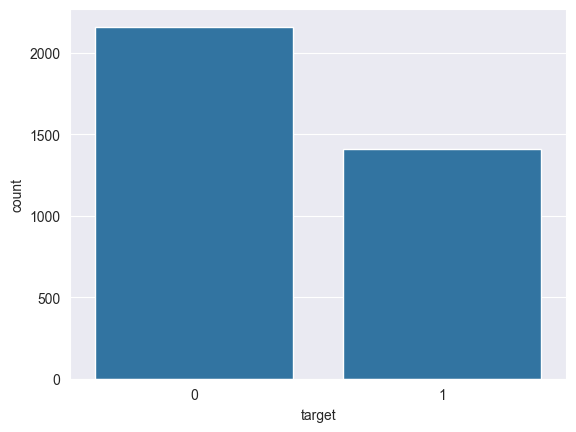

In [27]:

ax = sns.countplot(x=df["target"])

In [68]:
df["class"].value_counts()

TypeError: 'Styler' object is not subscriptable

# Приведение типа class к значениям [0, 1]

In [19]:
df["target"] = df["class"].apply(lambda x: 0 if x<0 else 1)
df.drop("class", inplace=True, axis=1, errors="ignore")
df

,news,target
0,В Башкирии маленький мальчик упал с велосипе...,0
1,В Белорецком районе ввели режим ЧС из-за лесн...,0
2,В Башкирии в селе Хамитово горят несколько уса...,0
3,В Башкирии судебного пристава нашли мертвым В ...,0
4,Пожар на нефтебазе в уфимской Нижегородке лока...,0
5,В Калтасинском районе уже третий день тушат ма...,0
6,Квартал у Ботанического сада Уфы застроят высо...,0
7,В Уфе электросамокатчик на скорости врезался в...,0
8,В Уфе маленький мальчик получил увечья при пад...,0
9,В Уфе ушла из жизни ветеран Великой Отечествен...,0


# Обучение rubert-tinyv2

In [32]:
# получим список предложений и их лейблов
sentences = df.news.values
labels = df.target.values

In [28]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3080 Laptop GPU


In [29]:
from transformers import AutoTokenizer, AutoModelForPreTraining

tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")

model = AutoModelForPreTraining.from_pretrained("cointegrated/rubert-tiny2")

tokenizer_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/118M [00:00<?, ?B/s]

In [33]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:    В Башкирии маленький мальчик упал с велосипеда и пропорол себе живот В Башкирии в детскую городскую больницу города Салавата экстренно доставили маленького мальчика.
Tokenized:  ['В', 'Башкирии', 'маленький', 'мальчик', 'упал', 'с', 'велосипеда', 'и', 'пропор', '##ол', 'себе', 'живот', 'В', 'Башкирии', 'в', 'детскую', 'городскую', 'больницу', 'города', 'Салават', '##а', 'экстренно', 'доставили', 'маленького', 'мальчика', '.']
Token IDs:  [282, 35047, 34713, 33023, 33169, 329, 74931, 320, 37294, 4375, 4404, 10442, 282, 35047, 314, 49685, 48237, 31498, 2813, 78672, 603, 71982, 37255, 41496, 33752, 18]


## Найдем максимальную длину предложений, чтобы усечь все до одинаковой длины или оставить максимально возможную длину 2048

In [34]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  1299


## Посмотрим на длины текстов

In [37]:
df['sym_len'] = df.news.apply(len)
df['word_len'] = df.news.apply(lambda x: len(x.split()))

<Axes: xlabel='sym_len', ylabel='Count'>

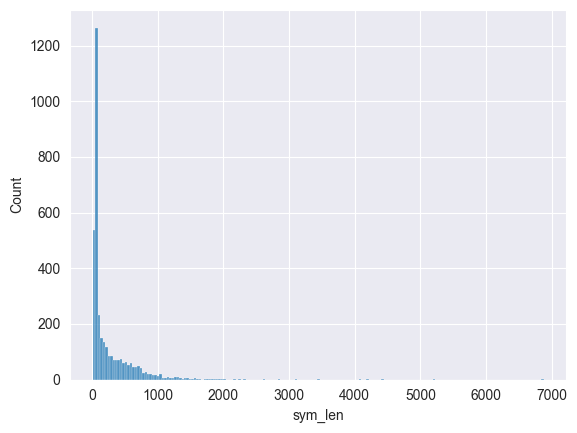

In [39]:
sns.histplot(data=df.sym_len)

<Axes: xlabel='word_len', ylabel='Count'>

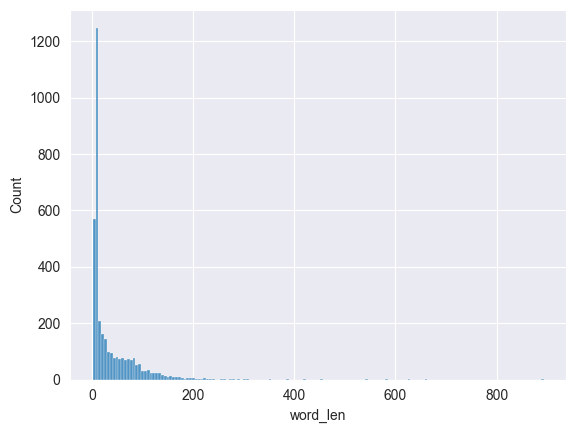

In [40]:
sns.histplot(data=df.word_len)

### Поскольку длина подавляющей части отзывов меньше 256, оставим максимально возможную длину, равную 256. Воспользуемся функцией tokenizer.encode_plus, которая разобьет предложения на токены, добавит специальные токены [CLS] и [SEP], заменит токены на их ID,приведет все предложения к одной длине - max_len и создаст attention masks.

In [42]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,
                        add_special_tokens = True,
                        max_length = 256,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_ids.append(encoded_dict['input_ids'])

    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:    В Башкирии маленький мальчик упал с велосипеда и пропорол себе живот В Башкирии в детскую городскую больницу города Салавата экстренно доставили маленького мальчика.
Token IDs: tensor([    2,   282, 35047, 34713, 33023, 33169,   329, 74931,   320, 37294,
         4375,  4404, 10442,   282, 35047,   314, 49685, 48237, 31498,  2813,
        78672,   603, 71982, 37255, 41496, 33752,    18,     3,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [43]:
input_ids.shape

torch.Size([3568, 256])

## Разделим данные на train и val в пропорции 90% к 10%.

In [45]:
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(input_ids, attention_masks, labels)

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

3,211 training samples
  357 validation samples


## Также создадим итератор с использование класса DataLoader из библиотеки torch.

In [46]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 16

train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset),
            batch_size = batch_size
        )

## Для этой задачи воспользуемся модифицированной весией преобученного BERT'а BertForSequenceClassification с дополнительным классификационным слоем поверх основной архитектуры.

In [47]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(
    "cointegrated/rubert-tiny2",
    num_labels = 5,
    output_attentions = False,
    output_hidden_states = False,
)

model.cuda()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, 

## Зададим optimizer и sheduler

In [48]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

## Для обучения зададим 3 эпохи

In [49]:
from transformers import get_linear_schedule_with_warmup


epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

## Воспользуемся вспомогательной функцией для вычисления точности и отслеживания затраченного времени

In [51]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [52]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))

    return str(datetime.timedelta(seconds=elapsed_rounded))

In [55]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    model.train()


    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        res = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = res['loss']
        logits = res['logits']

        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():

            res = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = res['loss']
        logits = res['logits']

        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)


    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.3f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {

            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    201.    Elapsed: 0:00:02.
  Batch    80  of    201.    Elapsed: 0:00:04.
  Batch   120  of    201.    Elapsed: 0:00:05.
  Batch   160  of    201.    Elapsed: 0:00:07.
  Batch   200  of    201.    Elapsed: 0:00:09.

  Average training loss: 0.40
  Training epcoh took: 0:00:09

Running Validation...
  Accuracy: 0.815
  Validation Loss: 0.41
  Validation took: 0:00:00

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    201.    Elapsed: 0:00:02.
  Batch    80  of    201.    Elapsed: 0:00:03.
  Batch   120  of    201.    Elapsed: 0:00:05.
  Batch   160  of    201.    Elapsed: 0:00:07.
  Batch   200  of    201.    Elapsed: 0:00:08.

  Average training loss: 0.40
  Training epcoh took: 0:00:08

Running Validation...
  Accuracy: 0.815
  Validation Loss: 0.41
  Validation took: 0:00:00

======== Epoch 3 / 3 ========
Training...
  Batch    40  of    201.    Elapsed: 0:00:02.
  Batch    80  of    201.    Elapsed: 0:00:03.

In [65]:
import pandas as pd

# Display floats with two decimal places.
#pd.set_option('precision', 3)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#x`df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.398142,0.414284,0.815217,0:00:09,0:00:00
2,0.399746,0.414284,0.815217,0:00:08,0:00:00
3,0.403386,0.414284,0.815217,0:00:08,0:00:00


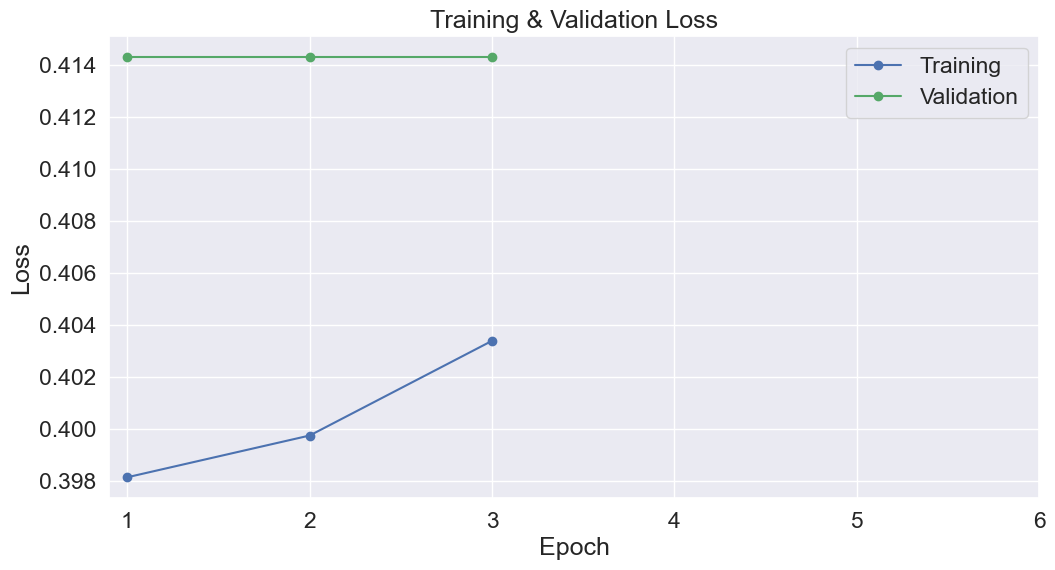

In [66]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6])

plt.show()